In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Initial Data Load:

In [199]:
df = pd.read_csv('Data/to_model.csv', index_col = 0)

In [200]:
df.reset_index(drop = True, inplace = True)
df.head(5)

,Winner,R_fighter,Fighter,Height,Reach,Stance,Weight,age,loss,win,...,attendance,num_rounds,label,matches,matches.1,Reach_diff,Weight_diff,Height_diff,round_age,round_age.1
0,win,Charles Oliveira,Charles Oliveira,61.0,74.0,Orthodox,155.0,30.43,8.0,16.0,...,0.0,5,0,26.0,17.0,-3.0,-15.0,-8.0,30.0,28.0
1,win,Gilbert Burns,Gilbert Burns,61.0,71.0,Orthodox,170.0,33.67,3.0,10.0,...,0.0,3,0,14.0,32.0,-1.0,0.0,-12.0,34.0,42.0
2,win,Renato Moicano,Damir Hadzovic,69.0,70.0,Orthodox,155.0,33.62,3.0,3.0,...,0.0,3,1,7.0,9.0,-2.0,0.0,8.0,34.0,31.0
3,win,Nikita Krylov,Nikita Krylov,75.0,77.0,Orthodox,205.0,28.04,5.0,7.0,...,0.0,3,0,13.0,5.0,-5.0,0.0,-3.0,28.0,28.0
4,win,Francisco Trinaldo,Francisco Trinaldo,69.0,70.0,Southpaw,155.0,41.58,6.0,14.0,...,0.0,3,0,21.0,17.0,2.0,0.0,1.0,42.0,35.0


In [201]:
pd.set_option('display.max_rows', 100)
df.isna().any()

Winner                           False
R_fighter                        False
Fighter                          False
Height                           False
Reach                            False
Stance                           False
Weight                           False
age                              False
loss                             False
win                              False
draws                            False
streak                           False
cum_match_time                   False
avg_cum_KD                       False
avg_cum_Sub. att                 False
avg_cum_Pass                     False
avg_cum_Rev.                     False
avg_cum_Sig. str. Hits           False
avg_cum_Sig. str. Attempts       False
avg_cum_Total str. Hits          False
avg_cum_Total str. Attempts      False
avg_cum_Td Hits                  False
avg_cum_Td Attempts              False
avg_cum_Head Hits                False
avg_cum_Head Attempts            False
avg_cum_Body Hits        

In [214]:
df.columns

Index(['Winner', 'R_fighter', 'Fighter', 'Height', 'Reach', 'Stance', 'Weight',
       'age', 'loss', 'win', 'draws', 'streak', 'cum_match_time', 'avg_cum_KD',
       'avg_cum_Sub. att', 'avg_cum_Pass', 'avg_cum_Rev.',
       'avg_cum_Sig. str. Hits', 'avg_cum_Sig. str. Attempts',
       'avg_cum_Total str. Hits', 'avg_cum_Total str. Attempts',
       'avg_cum_Td Hits', 'avg_cum_Td Attempts', 'avg_cum_Head Hits',
       'avg_cum_Head Attempts', 'avg_cum_Body Hits', 'avg_cum_Body Attempts',
       'avg_cum_Leg Hits', 'avg_cum_Leg Attempts', 'avg_cum_Distance Hits',
       'avg_cum_Distance Attempts', 'avg_cum_Clinch Hits',
       'avg_cum_Clinch Attempts', 'avg_cum_Ground Hits',
       'avg_cum_Ground Attempts', 'eff_sig_str', 'eff_hits', 'eff_tds',
       'eff_head', 'eff_leg', 'eff_body', 'eff_distance', 'eff_clinch',
       'eff_ground', 'Fighter.1', 'Height.1', 'Reach.1', 'Stance.1',
       'Weight.1', 'age.1', 'loss.1', 'win.1', 'draws.1', 'streak.1',
       'cum_match_time.1', 'av

In [203]:
df.shape

(5450, 99)

# Prepare Data for Model

### One-hot-encode Categorical

In [204]:
from sklearn.preprocessing import MultiLabelBinarizer

In [205]:
mlb_weight = MultiLabelBinarizer()
mlb_weight.fit([df['WEIGHT_CLASS']])

MultiLabelBinarizer(classes=None, sparse_output=False)

In [206]:
weight_classes = pd.DataFrame(mlb_weight.transform([[item] for item in df['WEIGHT_CLASS']]))
weight_classes.columns = mlb_weight.classes_
weight_classes

,Bantamweight,Catch Weight,Featherweight,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Open Weight,Super Heavyweight,Welterweight,Women's Bantamweight,Women's Featherweight,Women's Flyweight,Women's Strawweight
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5445,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5446,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5447,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5448,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [215]:
weight_classes.columns

Index(['Bantamweight', 'Catch Weight', 'Featherweight', 'Flyweight',
       'Heavyweight', 'Light Heavyweight', 'Lightweight', 'Middleweight',
       'Open Weight', 'Super Heavyweight', 'Welterweight',
       'Women's Bantamweight', 'Women's Featherweight', 'Women's Flyweight',
       'Women's Strawweight'],
      dtype='object')

In [207]:
mlb_stance = MultiLabelBinarizer()
mlb_stance.fit([df['Stance.1']]) #Stance.1 includes all unique values of stance

MultiLabelBinarizer(classes=None, sparse_output=False)

In [208]:
stance = pd.DataFrame(mlb_stance.transform([[item] for item in df['Stance']]))
stance.columns = mlb_stance.classes_

stance1 = pd.DataFrame(mlb_stance.transform([[item] for item in df['Stance.1']]))
stance1.columns = ['{}.1'.format(item) for item in mlb_stance.classes_]

In [216]:
stance.columns

Index(['Open Stance', 'Orthodox', 'Sideways', 'Southpaw', 'Switch'], dtype='object')

In [209]:
final_data = pd.concat([df, weight_classes, stance, stance1], axis = 1)

### Final Drop:

In [210]:
final_data.to_csv('Data/model_ready.csv')

drop_columns = ['WEIGHT_CLASS', 'Stance', 'Stance.1', 'Winner', 'R_fighter', 'Fighter', 'Fighter.1', 
                'location', 'Height', 'Weight', 'Reach', 'Height.1', 'Weight.1', 'Reach.1','round_age', 
                'round_age.1', 'attendance']


final_data.drop(drop_columns, axis = 1, inplace = True)

# ML Models:

In [211]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [212]:
X = final_data.loc[:, ~final_data.columns.isin(['label'])]
y = final_data.loc[:, 'label']

print(X.shape, y.shape)

(5450, 106) (5450,)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1000, stratify = y)

In [218]:
list(X.columns)

['age',
 'loss',
 'win',
 'draws',
 'streak',
 'cum_match_time',
 'avg_cum_KD',
 'avg_cum_Sub. att',
 'avg_cum_Pass',
 'avg_cum_Rev.',
 'avg_cum_Sig. str. Hits',
 'avg_cum_Sig. str. Attempts',
 'avg_cum_Total str. Hits',
 'avg_cum_Total str. Attempts',
 'avg_cum_Td Hits',
 'avg_cum_Td Attempts',
 'avg_cum_Head Hits',
 'avg_cum_Head Attempts',
 'avg_cum_Body Hits',
 'avg_cum_Body Attempts',
 'avg_cum_Leg Hits',
 'avg_cum_Leg Attempts',
 'avg_cum_Distance Hits',
 'avg_cum_Distance Attempts',
 'avg_cum_Clinch Hits',
 'avg_cum_Clinch Attempts',
 'avg_cum_Ground Hits',
 'avg_cum_Ground Attempts',
 'eff_sig_str',
 'eff_hits',
 'eff_tds',
 'eff_head',
 'eff_leg',
 'eff_body',
 'eff_distance',
 'eff_clinch',
 'eff_ground',
 'age.1',
 'loss.1',
 'win.1',
 'draws.1',
 'streak.1',
 'cum_match_time.1',
 'avg_cum_KD.1',
 'avg_cum_Sub. att.1',
 'avg_cum_Pass.1',
 'avg_cum_Rev..1',
 'avg_cum_Sig. str. Hits.1',
 'avg_cum_Sig. str. Attempts.1',
 'avg_cum_Total str. Hits.1',
 'avg_cum_Total str. Attempts.1',
 'avg_cum_Td Hits.1',
 'avg_cum_Td Attempts.1',
 'avg_cum_Head Hits.1',
 'avg_cum_Head Attempts.1',
 'avg_cum_Body Hits.1',
 'avg_cum_Body Attempts.1',
 'avg_cum_Leg Hits.1',
 'avg_cum_Leg Attempts.1',
 'avg_cum_Distance Hits.1',
 'avg_cum_Distance Attempts.1',
 'avg_cum_Clinch Hits.1',
 'avg_cum_Clinch Attempts.1',
 'avg_cum_Ground Hits.1',
 'avg_cum_Ground Attempts.1',
 'eff_sig_str.1',
 'eff_hits.1',
 'eff_tds.1',
 'eff_head.1',
 'eff_leg.1',
 'eff_body.1',
 'eff_distance.1',
 'eff_clinch.1',
 'eff_ground.1',
 'title_bout',
 'num_rounds',
 'matches',
 'matches.1',
 'Reach_diff',
 'Weight_diff',
 'Height_diff',
 'Bantamweight',
 'Catch Weight',
 'Featherweight',
 'Flyweight',
 'Heavyweight',
 'Light Heavyweight',
 'Lightweight',
 'Middleweight',
 'Open Weight',
 'Super Heavyweight',
 'Welterweight',
 "Women's Bantamweight",
 "Women's Featherweight",
 "Women's Flyweight",
 "Women's Strawweight",
 'Open Stance',
 'Orthodox',
 'Sideways',
 'Southpaw',
 'Switch',
 'Open Stance.1',
 'Orthodox.1',
 'Sideways.1',
 'Southpaw.1',
 'Switch.1']

# Random Forest Classifier

In [124]:
rf_params = {
    'n_estimators': [100],
    'max_features': [20, 40, 60, 80, 100]
}

In [125]:
rfGrid = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, cv=5, verbose=1)

In [126]:
rfGrid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [230]:
pd.Series(rfGrid.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending = False)

age                          0.027641
avg_cum_Head Hits            0.023452
age.1                        0.022980
avg_cum_Ground Attempts.1    0.021329
avg_cum_Total str. Hits      0.019547
                               ...   
Open Stance.1                0.000074
Open Stance                  0.000069
Sideways                     0.000008
Super Heavyweight            0.000008
Sideways.1                   0.000008
Length: 106, dtype: float64

In [128]:
rfGrid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=40, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [129]:
rfGrid.score(X_test, y_test)

0.618348623853211

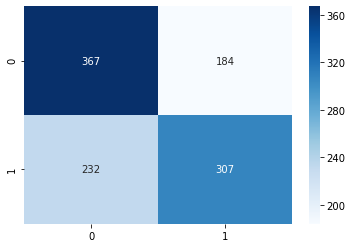

In [130]:
rf_roc = roc_auc_score(y_test, rfGrid.predict_proba(X_test)[:, 1])
rf_cm = confusion_matrix(y_test, rfGrid.predict(X_test))
sns.heatmap(rf_cm, annot=True, fmt = 'd', cmap = 'Blues')

# XGBoost

In [131]:
xgb_params = {
    'booster': ['gbtree', 'gblinear'],
    'eta': [.01, .05, .1, .15, .2, .3]
    
}

In [132]:
xgbGrid = GridSearchCV(XGBClassifier(), param_grid=xgb_params)

In [133]:
xgbGrid.fit(X_train, y_train)

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_con...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                   

In [134]:
xgbGrid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.05, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.0500000007, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [135]:
xgbGrid.score(X_test, y_test)

0.6036697247706422

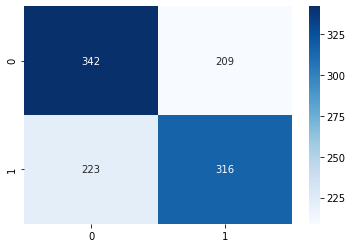

In [136]:
xgb_roc = roc_auc_score(y_test, xgbGrid.predict_proba(X_test)[:, 1])
xgb_cm = confusion_matrix(y_test, xgbGrid.predict(X_test))
sns.heatmap(xgb_cm, annot=True, fmt = 'd', cmap = 'Blues');

In [137]:
explainer = shap.TreeExplainer(xgbGrid.best_estimator_)
shap_values = explainer.shap_values(X_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


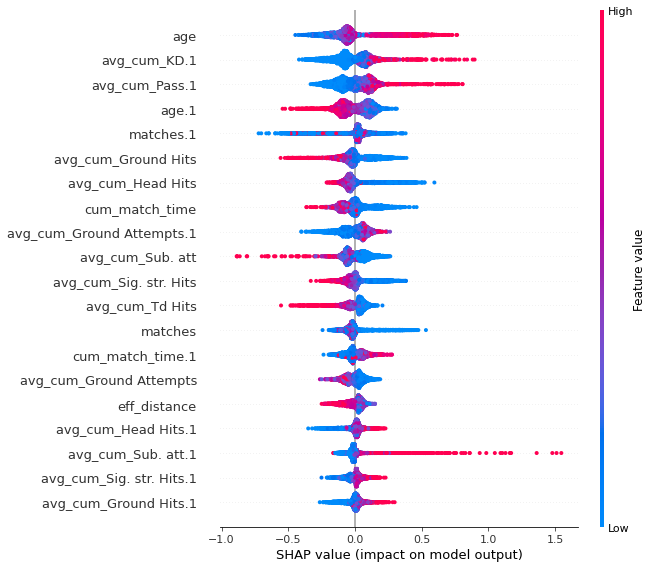

In [138]:
shap.summary_plot(shap_values, X_train)

High SHAP values indicate value closer to 1. In this graph, this shows high values of age.0 (indicated by red) lean towards high values of 1 winning. Similarily, high values of age.1 indicate values closer to 0 winning.  

# Remodel, removing high cardinal categorical variables

In [139]:
continuous_columns = ['age','loss','win','draws','streak','cum_match_time','avg_cum_KD',
                 'avg_cum_Sub. att', 'avg_cum_Pass','avg_cum_Rev.','avg_cum_Sig. str. Hits','avg_cum_Sig. str. Attempts',
                 'avg_cum_Total str. Hits','avg_cum_Total str. Attempts','avg_cum_Td Hits','avg_cum_Td Attempts',
                 'avg_cum_Head Hits','avg_cum_Head Attempts','avg_cum_Body Hits','avg_cum_Body Attempts',
                 'avg_cum_Leg Hits','avg_cum_Leg Attempts','avg_cum_Distance Hits','avg_cum_Distance Attempts',
                 'avg_cum_Clinch Hits','avg_cum_Clinch Attempts','avg_cum_Ground Hits','avg_cum_Ground Attempts',
                 'eff_sig_str','eff_hits','eff_tds','eff_head','eff_leg','eff_body','eff_distance','eff_clinch','eff_ground',
                 'age.1','loss.1','win.1','draws.1','streak.1','cum_match_time.1',
                 'avg_cum_KD.1','avg_cum_Sub. att.1','avg_cum_Pass.1','avg_cum_Rev..1','avg_cum_Sig. str. Hits.1',
                 'avg_cum_Sig. str. Attempts.1','avg_cum_Total str. Hits.1','avg_cum_Total str. Attempts.1',
                 'avg_cum_Td Hits.1','avg_cum_Td Attempts.1','avg_cum_Head Hits.1','avg_cum_Head Attempts.1',
                 'avg_cum_Body Hits.1','avg_cum_Body Attempts.1','avg_cum_Leg Hits.1','avg_cum_Leg Attempts.1',
                 'avg_cum_Distance Hits.1','avg_cum_Distance Attempts.1','avg_cum_Clinch Hits.1','avg_cum_Clinch Attempts.1',
                 'avg_cum_Ground Hits.1','avg_cum_Ground Attempts.1','eff_sig_str.1','eff_hits.1','eff_tds.1','eff_head.1',
                 'eff_leg.1','eff_body.1','eff_distance.1','eff_clinch.1','eff_ground.1','num_rounds','matches',
                 'matches.1','Reach_diff','Weight_diff','Height_diff'
]

In [140]:
X_continuous_train = X_train[continuous_columns]
X_continuous_test = X_test[continuous_columns]

In [141]:
rf_continuous = RandomForestClassifier(n_estimators=100, max_features=80)
rf_continuous.fit(X_continuous_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=80, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [142]:
xgb_continuous = XGBClassifier(eta=.05)
xgb_continuous.fit(X_continuous_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.05, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.0500000007, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [170]:
print("Accuracies:")
print(accuracy_score(y_test, rfGrid.best_estimator_.predict(X_test)))  
print(accuracy_score(y_test, xgbGrid.best_estimator_.predict(X_test)))    
print(accuracy_score(y_test, rf_continuous.predict(X_continuous_test)))
print(accuracy_score(y_test, xgb_continuous.predict(X_continuous_test)))
print('\n')
print("ROC AUC:")
print(roc_auc_score(y_test, rfGrid.best_estimator_.predict_proba(X_test)[:, 1]))  
print(roc_auc_score(y_test, xgbGrid.best_estimator_.predict_proba(X_test)[:, 1]))    
print(roc_auc_score(y_test, rf_continuous.predict_proba(X_continuous_test)[:, 1]))
print(roc_auc_score(y_test, xgb_continuous.predict_proba(X_continuous_test)[:, 1]))

Accuracies:
0.618348623853211
0.6036697247706422
0.6110091743119266
0.6110091743119266


ROC AUC:
0.6626053490196606
0.6718700019192629
0.6678378660489109
0.6699271690197279


# Scale the Data:

In [144]:
from sklearn.preprocessing import StandardScaler

In [146]:
scale_columns = ['age','loss','win','draws','streak','cum_match_time','avg_cum_KD',
                 'avg_cum_Sub. att', 'avg_cum_Pass','avg_cum_Rev.','avg_cum_Sig. str. Hits','avg_cum_Sig. str. Attempts',
                 'avg_cum_Total str. Hits','avg_cum_Total str. Attempts','avg_cum_Td Hits','avg_cum_Td Attempts',
                 'avg_cum_Head Hits','avg_cum_Head Attempts','avg_cum_Body Hits','avg_cum_Body Attempts',
                 'avg_cum_Leg Hits','avg_cum_Leg Attempts','avg_cum_Distance Hits','avg_cum_Distance Attempts',
                 'avg_cum_Clinch Hits','avg_cum_Clinch Attempts','avg_cum_Ground Hits','avg_cum_Ground Attempts',
                 'eff_sig_str','eff_hits','eff_tds','eff_head','eff_leg','eff_body','eff_distance','eff_clinch','eff_ground',
                 'age.1','loss.1','win.1','draws.1','streak.1','cum_match_time.1',
                 'avg_cum_KD.1','avg_cum_Sub. att.1','avg_cum_Pass.1','avg_cum_Rev..1','avg_cum_Sig. str. Hits.1',
                 'avg_cum_Sig. str. Attempts.1','avg_cum_Total str. Hits.1','avg_cum_Total str. Attempts.1',
                 'avg_cum_Td Hits.1','avg_cum_Td Attempts.1','avg_cum_Head Hits.1','avg_cum_Head Attempts.1',
                 'avg_cum_Body Hits.1','avg_cum_Body Attempts.1','avg_cum_Leg Hits.1','avg_cum_Leg Attempts.1',
                 'avg_cum_Distance Hits.1','avg_cum_Distance Attempts.1','avg_cum_Clinch Hits.1','avg_cum_Clinch Attempts.1',
                 'avg_cum_Ground Hits.1','avg_cum_Ground Attempts.1','eff_sig_str.1','eff_hits.1','eff_tds.1','eff_head.1',
                 'eff_leg.1','eff_body.1','eff_distance.1','eff_clinch.1','eff_ground.1','num_rounds','matches',
                 'matches.1','Reach_diff','Weight_diff','Height_diff'
]

unscale_columns = [item for item in X.columns if item not in scale_columns]
unscale_columns

['title_bout',
 'Bantamweight',
 'Catch Weight',
 'Featherweight',
 'Flyweight',
 'Heavyweight',
 'Light Heavyweight',
 'Lightweight',
 'Middleweight',
 'Open Weight',
 'Super Heavyweight',
 'Welterweight',
 "Women's Bantamweight",
 "Women's Featherweight",
 "Women's Flyweight",
 "Women's Strawweight",
 'Open Stance',
 'Orthodox',
 'Sideways',
 'Southpaw',
 'Switch',
 'Open Stance.1',
 'Orthodox.1',
 'Sideways.1',
 'Southpaw.1',
 'Switch.1']

In [147]:
scaler = StandardScaler()
X_scale_train = pd.DataFrame(scaler.fit_transform(X_train[scale_columns]), index=X_train.index)
X_scale_train.columns = scale_columns

In [148]:
X_scale_train = pd.concat([X_scale_train, X_train[unscale_columns]], axis = 1)
X_scale_train

,age,loss,win,draws,streak,cum_match_time,avg_cum_KD,avg_cum_Sub. att,avg_cum_Pass,avg_cum_Rev.,...,Open Stance,Orthodox,Sideways,Southpaw,Switch,Open Stance.1,Orthodox.1,Sideways.1,Southpaw.1,Switch.1
619,0.206180,-0.328210,-0.313580,-0.274859,-0.742721,-0.435456,-0.178934,-0.425802,0.933093,-0.415122,...,0,1,0,0,0,0,0,0,1,0
909,1.859300,3.139070,4.294378,-0.274859,-1.259355,4.927767,-0.169177,-0.010606,0.574863,-0.041822,...,0,0,0,1,0,0,0,0,0,1
2955,1.125295,-0.823536,-0.855693,-0.274859,-0.226087,-0.632668,-0.178934,0.341158,-0.674230,1.252283,...,0,1,0,0,0,0,1,0,0,0
5016,-0.157603,-0.823536,-0.855693,-0.274859,-0.226087,-0.632668,-0.178934,-0.425802,-0.358422,-0.415122,...,0,1,0,0,0,0,1,0,0,0
4813,-4.669478,-0.823536,-0.855693,-0.274859,-0.226087,-0.632668,-0.178934,1.113884,-0.047327,1.252283,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4630,-0.852976,-0.823536,-0.855693,-0.274859,-0.226087,-0.731014,-0.178934,0.808253,-0.674230,-0.415122,...,0,1,0,0,0,0,0,0,1,0
3109,-0.532654,-0.328210,0.499589,-0.274859,1.323816,0.483131,-0.136652,-0.425802,-0.377276,-0.091595,...,0,1,0,0,0,0,0,0,1,0
1083,0.291492,-0.328210,0.228533,-0.274859,-0.742721,-0.412561,-0.178934,0.196992,1.197052,0.480797,...,0,1,0,0,0,0,1,0,0,0
1706,0.528112,3.139070,2.668040,-0.274859,0.290548,1.801865,-0.117138,0.537222,0.904812,0.854097,...,0,1,0,0,0,0,0,0,1,0


In [179]:
joblib.dump(scaler, 'scaler')

['scaler']

In [82]:
X_scale_test = pd.DataFrame(scaler.transform(X_test[scale_columns]), index=X_test.index)
X_scale_test.columns = scale_columns

X_scale_test = pd.concat([X_scale_test, X_test[unscale_columns]], axis = 1)
X_scale_test

,age,loss,win,draws,streak,cum_match_time,avg_cum_KD,avg_cum_Sub. att,avg_cum_Pass,avg_cum_Rev.,...,Open Stance,Orthodox,Sideways,Southpaw,Switch,Open Stance.1,Orthodox.1,Sideways.1,Southpaw.1,Switch.1
4842,-0.344323,-0.823536,-0.855693,-0.274859,-0.226087,-0.632668,0.038978,-0.039439,-0.674230,-0.415122,...,0,1,0,0,0,0,1,0,0,0
4146,0.093504,0.167116,-0.855693,-0.274859,-1.259355,-0.562421,-0.178934,-0.125938,-0.179307,0.878983,...,0,0,0,1,0,0,1,0,0,0
1302,0.235154,1.653093,0.770646,-0.274859,-0.742721,1.312392,-0.126895,-0.247037,-0.414984,0.754550,...,0,1,0,0,0,0,0,0,1,0
3551,0.772780,-0.823536,-0.584636,-0.274859,0.290548,-0.632668,-0.178934,1.113884,-0.674230,2.894801,...,0,1,0,0,0,0,1,0,0,0
5422,-4.669478,-0.328210,-0.313580,-0.274859,0.290548,-0.761194,-0.178934,1.096584,-0.052040,-0.415122,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,0.465335,0.662441,-0.313580,-0.274859,-1.259355,0.022970,-0.178934,0.122026,-0.136885,0.530570,...,0,0,0,1,0,0,1,0,0,0
5330,-4.669478,-0.823536,-0.584636,-0.274859,0.290548,-0.876711,-0.178934,5.773310,9.464634,-0.415122,...,0,1,0,0,0,0,1,0,0,0
3774,-0.358810,-0.823536,-0.313580,-0.274859,0.807182,-0.545423,-0.178934,0.150859,0.970802,-0.415122,...,0,1,0,0,0,0,0,0,1,0
2646,-0.634062,-0.328210,-0.855693,-0.274859,-0.742721,-0.632668,-0.178934,-0.039439,-0.358422,1.252283,...,0,0,0,1,0,0,0,0,1,0


In [83]:
print(X_scale_test.shape, X_scale_train.shape)

(1090, 106) (4360, 106)


# Logistic Regression

In [149]:
log_params = [{'penalty': ['l1', 'l2'],
               'C': [.25, .5, .75, 1],
               'max_iter': [1000],
              'solver': ['liblinear']}    
    ]

logGrid = GridSearchCV(LogisticRegression(), param_grid=log_params, cv=5, verbose=1)

In [150]:
logGrid.fit(X_scale_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    5.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.25, 0.5, 0.75, 1], 'max_iter': [1000],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [151]:
logGrid.best_estimator_

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [152]:
logGrid.score(X_scale_test, y_test)

0.6192660550458715

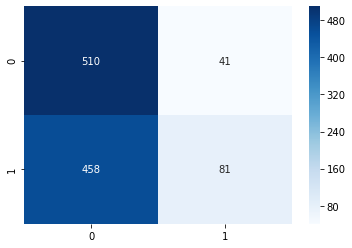

In [153]:
log_roc = roc_auc_score(y_test, logGrid.predict_proba(X_test)[:, 1])
log_cm = confusion_matrix(y_test, logGrid.predict(X_test))
sns.heatmap(log_cm, annot=True, fmt = 'd', cmap = 'Blues');

In [154]:
logGrid.predict(X_scale_test)

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

ROC AUC LOG:  0.6028573448848273
ROC AUC RF:  0.6626053490196606
ROC AUC XGB:  0.6718700019192629


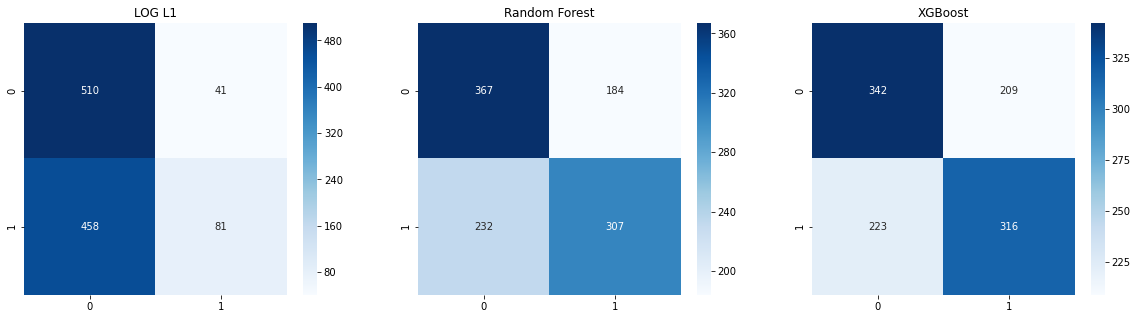

In [155]:
f, ax = plt.subplots(1, 3, figsize = [20, 5])

sns.heatmap(log_cm, annot=True, fmt = 'd', cmap = 'Blues', ax = ax[0])
sns.heatmap(rf_cm, annot=True, fmt = 'd', cmap = 'Blues', ax = ax[1])
sns.heatmap(xgb_cm, annot=True, fmt = 'd', cmap = 'Blues', ax = ax[2]);

ax[0].set_title('LOG L1')
ax[1].set_title('Random Forest')
ax[2].set_title('XGBoost')

#Relatively similar performance

print('ROC AUC LOG: ', log_roc)
print('ROC AUC RF: ', rf_roc)
print('ROC AUC XGB: ', xgb_roc)

# Blended Model:

In [156]:
X_T, X_val, y_T, y_val = train_test_split(X_train, y_train, test_size = .4, random_state = 1000, stratify = y_train)

In [157]:
log_unscale_params = {
    'max_iter': [5000],
    'C': [.25, .5, .75, 1],
    'solver': ['liblinear']
}

unscaleLogGrid = GridSearchCV(LogisticRegression(), param_grid=log_unscale_params)
unscaleLogGrid.fit(X_T, y_T)

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.25, 0.5, 0.75, 1], 'max_iter': [5000],
                         'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [159]:
blend_rf = RandomForestClassifier(n_estimators=100, max_features=100)
blend_rf.fit(X_T, y_T)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=100, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [161]:
blend_xgb = XGBClassifier(eta=.1)
blend_xgb.fit(X_T, y_T)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.100000001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

### Create Features:

In [162]:
blend_log_predictions = pd.Series(unscaleLogGrid.predict_proba(X_val)[:, 1], index=X_val.index)
blend_rf_predictions = pd.Series(blend_rf.predict_proba(X_val)[:, 1], index=X_val.index)
blend_xgb_predictions = pd.Series(blend_xgb.predict_proba(X_val)[:, 1], index=X_val.index)

### Create Test-set

In [163]:
print('LOG:', unscaleLogGrid.score(X_val, y_val), '\n')
print('RF:', blend_rf.score(X_val, y_val), '\n')
print('XGB:', blend_xgb.score(X_val, y_val), '\n')

blend_log_test = pd.Series(unscaleLogGrid.predict_proba(X_test)[:, 1], index = X_test.index)
blend_rf_test = pd.Series(blend_rf.predict_proba(X_test)[:, 1], index = X_test.index)
blend_xgb_test = pd.Series(blend_xgb.predict_proba(X_test)[:, 1], index = X_test.index)

X_blend_test = pd.concat([blend_log_test, blend_rf_test, blend_xgb_test], axis = 1)
X_blend_test.columns = ['LOG', 'RF', 'XGB']

LOG: 0.6009174311926605 

RF: 0.6278669724770642 

XGB: 0.6278669724770642 



In [164]:
blended_features = pd.concat([blend_log_predictions, blend_rf_predictions, blend_xgb_predictions, y_val], axis = 1)
blended_features.columns = ['LOG', 'RF', 'XGB', 'label']
blended_features

,LOG,RF,XGB,label
4913,0.581772,0.45,0.426941,0
2554,0.452798,0.53,0.614879,1
4887,0.735847,0.61,0.724069,1
1167,0.316120,0.72,0.596112,1
934,0.542832,0.42,0.319548,0
...,...,...,...,...
2667,0.620597,0.64,0.536936,0
179,0.535420,0.57,0.715373,0
4437,0.839445,0.94,0.981406,1
1930,0.081758,0.42,0.135036,0


In [165]:
blendLog = LogisticRegression()
blendLog.fit(blended_features.iloc[:, 0:3], blended_features.iloc[:, 3])

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Blended Accuracy: 0.6201834862385321
Blended ROC AUC: 0.6746512497095851


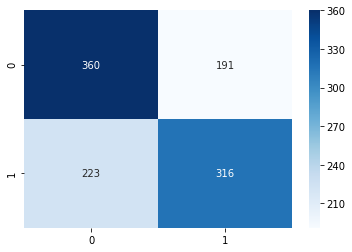

In [167]:
print('Blended Accuracy:', blendLog.score(X_blend_test, y_test))
print('Blended ROC AUC:', roc_auc_score(y_test, blendLog.predict_proba(X_blend_test)[:, 1]))
blend_cm = confusion_matrix(y_test, blendLog.predict(X_blend_test))
sns.heatmap(blend_cm, annot=True, fmt = 'd', cmap = 'Blues');

# Neural Network:

In [25]:
from tensorflow.keras.layers import Layer, Dense, Input, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


In [26]:
class RocAucEval(Callback):
    def __init__(self, validation_data = (), interval = 5):
        
        super(Callback, self).__init__()
        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0: #Test if interval has been met:
            y_pred = self.model.predict(self.X_val, verbose = 0)
            try:
                score = roc_auc_score(self.y_val, y_pred)
            except:
                score = 0
                pass
            print('\n ROC-AUC - epoch: {} score: {} \n'.format(epoch+1, score))


In [27]:
def get_model(dropout, n_size, input_size):
    model = Sequential()
    model.add(Dense(n_size, input_dim=input_size, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    

    model.compile(loss = 'binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

    return model


# GridSearch

In [51]:
nn_params = {
    'dropout': [.2, .4, .6, .8],
    'n_size': [16, 32, 64, 128],
    'input_size': [X_scale_train.shape[1]],
    'epochs': [5,10,15,20],
}


In [52]:
mod = KerasClassifier(build_fn=get_model)
keras_grid = GridSearchCV(estimator=mod, param_grid=nn_params)

In [53]:
keras_grid.fit(X_scale_train, np.array(y_train), batch_size=32)

C:\Users\lzeng\AppData\Local\Continuum\anaconda3\envs\[Lance]\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Train on 2906 samples
Epoch 1/5
2906/2906 [==============================] - 0s 137us/sample - loss: 0.7303 - accuracy: 0.5461
Epoch 2/5
2906/2906 [==============================] - 0s 42us/sample - loss: 0.6690 - accuracy: 0.6039
Epoch 3/5
2906/2906 [==============================] - 0s 44us/sample - loss: 0.6550 - accuracy: 0.6115
Epoch 4/5
2906/2906 [==============================] - 0s 43us/sample - loss: 0.6416 - accuracy: 0.6198
Epoch 5/5
1454/1454 [==============================] - 0s 65us/sample - loss: 0.6609 - accuracy: 0.5901
Train on 2907 samples
Epoch 1/5
2907/2907 [==============================] - 0s 130us/sample - loss: 0.7794 - accuracy: 0.5339
Epoch 2/5
2907/2907 [==============================] - 0s 44us/sample - loss: 0.6963 - accuracy: 0.5655
Epoch 3/5
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6690 - accuracy: 0.5903
Epoch 4/5
2907/2907 [==============================] - 0s 42us/sample - loss: 0.6530 - accuracy: 0.6120
Epoch 5/5
1453/145

2906/2906 [==============================] - 0s 42us/sample - loss: 0.6324 - accuracy: 0.6425
Epoch 6/10
2906/2906 [==============================] - 0s 42us/sample - loss: 0.6237 - accuracy: 0.6418
Epoch 7/10
2906/2906 [==============================] - 0s 41us/sample - loss: 0.6186 - accuracy: 0.6507
Epoch 8/10
2906/2906 [==============================] - 0s 40us/sample - loss: 0.6197 - accuracy: 0.6518
Epoch 9/10
2906/2906 [==============================] - 0s 40us/sample - loss: 0.6128 - accuracy: 0.6583
Epoch 10/10
1454/1454 [==============================] - 0s 55us/sample - loss: 0.6551 - accuracy: 0.6025
Train on 2907 samples
Epoch 1/10
2907/2907 [==============================] - 0s 122us/sample - loss: 0.7486 - accuracy: 0.5308
Epoch 2/10
2907/2907 [==============================] - 0s 43us/sample - loss: 0.6709 - accuracy: 0.5944
Epoch 3/10
2907/2907 [==============================] - 0s 42us/sample - loss: 0.6544 - accuracy: 0.6219
Epoch 4/10
2907/2907 [====================

2907/2907 [==============================] - 0s 43us/sample - loss: 0.6053 - accuracy: 0.6632
Epoch 6/10
2907/2907 [==============================] - 0s 42us/sample - loss: 0.5986 - accuracy: 0.6708
Epoch 7/10
2907/2907 [==============================] - 0s 41us/sample - loss: 0.5889 - accuracy: 0.6825
Epoch 8/10
2907/2907 [==============================] - 0s 42us/sample - loss: 0.5820 - accuracy: 0.6852
Epoch 9/10
2907/2907 [==============================] - 0s 43us/sample - loss: 0.5702 - accuracy: 0.6959
Epoch 10/10
1453/1453 [==============================] - 0s 57us/sample - loss: 0.6492 - accuracy: 0.6311
Train on 2907 samples
Epoch 1/10
2907/2907 [==============================] - 0s 122us/sample - loss: 0.7076 - accuracy: 0.5576
Epoch 2/10
2907/2907 [==============================] - 0s 46us/sample - loss: 0.6561 - accuracy: 0.6058
Epoch 3/10
2907/2907 [==============================] - 0s 46us/sample - loss: 0.6453 - accuracy: 0.6223
Epoch 4/10
2907/2907 [====================

2907/2907 [==============================] - 0s 38us/sample - loss: 0.6061 - accuracy: 0.6560
Epoch 12/15
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6005 - accuracy: 0.6639
Epoch 13/15
2907/2907 [==============================] - 0s 38us/sample - loss: 0.5949 - accuracy: 0.6691
Epoch 14/15
2907/2907 [==============================] - 0s 38us/sample - loss: 0.5913 - accuracy: 0.6808
Epoch 15/15
1453/1453 [==============================] - 0s 60us/sample - loss: 0.6494 - accuracy: 0.6256
Train on 2907 samples
Epoch 1/15
2907/2907 [==============================] - 0s 126us/sample - loss: 0.7477 - accuracy: 0.5325
Epoch 2/15
2907/2907 [==============================] - 0s 38us/sample - loss: 0.6893 - accuracy: 0.5803
Epoch 3/15
2907/2907 [==============================] - 0s 36us/sample - loss: 0.6696 - accuracy: 0.6044
Epoch 4/15
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6544 - accuracy: 0.6103
Epoch 5/15
2907/2907 [=================

2906/2906 [==============================] - 0s 48us/sample - loss: 0.5717 - accuracy: 0.6906
Epoch 9/15
2906/2906 [==============================] - 0s 50us/sample - loss: 0.5610 - accuracy: 0.7085
Epoch 10/15
2906/2906 [==============================] - 0s 48us/sample - loss: 0.5554 - accuracy: 0.7216
Epoch 11/15
2906/2906 [==============================] - 0s 47us/sample - loss: 0.5533 - accuracy: 0.7209
Epoch 12/15
2906/2906 [==============================] - 0s 45us/sample - loss: 0.5471 - accuracy: 0.7168
Epoch 13/15
2906/2906 [==============================] - 0s 41us/sample - loss: 0.5414 - accuracy: 0.7240
Epoch 14/15
2906/2906 [==============================] - 0s 43us/sample - loss: 0.5365 - accuracy: 0.7292
Epoch 15/15
1454/1454 [==============================] - 0s 70us/sample - loss: 0.6672 - accuracy: 0.6190
Train on 2907 samples
Epoch 1/15
2907/2907 [==============================] - 0s 149us/sample - loss: 0.7014 - accuracy: 0.5741
Epoch 2/15
2907/2907 [===============

2907/2907 [==============================] - 0s 46us/sample - loss: 0.5954 - accuracy: 0.6784
Epoch 6/15
2907/2907 [==============================] - 0s 45us/sample - loss: 0.5788 - accuracy: 0.6863
Epoch 7/15
2907/2907 [==============================] - 0s 46us/sample - loss: 0.5790 - accuracy: 0.6959
Epoch 8/15
2907/2907 [==============================] - 0s 45us/sample - loss: 0.5608 - accuracy: 0.7076
Epoch 9/15
2907/2907 [==============================] - 0s 46us/sample - loss: 0.5529 - accuracy: 0.7128
Epoch 10/15
2907/2907 [==============================] - 0s 46us/sample - loss: 0.5364 - accuracy: 0.7344
Epoch 11/15
2907/2907 [==============================] - 0s 45us/sample - loss: 0.5304 - accuracy: 0.7248
Epoch 12/15
2907/2907 [==============================] - 0s 42us/sample - loss: 0.5281 - accuracy: 0.7327
Epoch 13/15
2907/2907 [==============================] - 0s 42us/sample - loss: 0.5130 - accuracy: 0.7564
Epoch 14/15
2907/2907 [==============================] - 0s 42

2906/2906 [==============================] - 0s 38us/sample - loss: 0.6403 - accuracy: 0.6266
Epoch 4/20
2906/2906 [==============================] - 0s 37us/sample - loss: 0.6312 - accuracy: 0.6352
Epoch 5/20
2906/2906 [==============================] - 0s 38us/sample - loss: 0.6178 - accuracy: 0.6483
Epoch 6/20
2906/2906 [==============================] - 0s 38us/sample - loss: 0.6139 - accuracy: 0.6614
Epoch 7/20
2906/2906 [==============================] - 0s 38us/sample - loss: 0.6044 - accuracy: 0.6662
Epoch 8/20
2906/2906 [==============================] - 0s 39us/sample - loss: 0.5984 - accuracy: 0.6776
Epoch 9/20
2906/2906 [==============================] - 0s 39us/sample - loss: 0.5922 - accuracy: 0.6752
Epoch 10/20
2906/2906 [==============================] - 0s 38us/sample - loss: 0.5839 - accuracy: 0.6934
Epoch 11/20
2906/2906 [==============================] - 0s 38us/sample - loss: 0.5880 - accuracy: 0.6913
Epoch 12/20
2906/2906 [==============================] - 0s 35us

2906/2906 [==============================] - 0s 49us/sample - loss: 0.5151 - accuracy: 0.7498
Epoch 18/20
2906/2906 [==============================] - 0s 49us/sample - loss: 0.5101 - accuracy: 0.7412
Epoch 19/20
2906/2906 [==============================] - 0s 48us/sample - loss: 0.5040 - accuracy: 0.7505
Epoch 20/20
1454/1454 [==============================] - 0s 64us/sample - loss: 0.6789 - accuracy: 0.6100
Train on 2907 samples
Epoch 1/20
2907/2907 [==============================] - 0s 134us/sample - loss: 0.6995 - accuracy: 0.5728
Epoch 2/20
2907/2907 [==============================] - 0s 43us/sample - loss: 0.6598 - accuracy: 0.6047
Epoch 3/20
2907/2907 [==============================] - 0s 47us/sample - loss: 0.6326 - accuracy: 0.6295
Epoch 4/20
2907/2907 [==============================] - 0s 43us/sample - loss: 0.6286 - accuracy: 0.6340
Epoch 5/20
2907/2907 [==============================] - 0s 45us/sample - loss: 0.6130 - accuracy: 0.6605
Epoch 6/20
2907/2907 [==================

2907/2907 [==============================] - 0s 47us/sample - loss: 0.5376 - accuracy: 0.7303
Epoch 11/20
2907/2907 [==============================] - 0s 46us/sample - loss: 0.5297 - accuracy: 0.7355
Epoch 12/20
2907/2907 [==============================] - 0s 48us/sample - loss: 0.5144 - accuracy: 0.7465
Epoch 13/20
2907/2907 [==============================] - 0s 46us/sample - loss: 0.5081 - accuracy: 0.7530
Epoch 14/20
2907/2907 [==============================] - 0s 47us/sample - loss: 0.4973 - accuracy: 0.7540
Epoch 15/20
2907/2907 [==============================] - 0s 47us/sample - loss: 0.4907 - accuracy: 0.7719
Epoch 16/20
2907/2907 [==============================] - 0s 48us/sample - loss: 0.4875 - accuracy: 0.7620
Epoch 17/20
2907/2907 [==============================] - 0s 48us/sample - loss: 0.4735 - accuracy: 0.7702
Epoch 18/20
2907/2907 [==============================] - 0s 49us/sample - loss: 0.4708 - accuracy: 0.7816
Epoch 19/20
2907/2907 [==============================] - 0

2907/2907 [==============================] - 0s 45us/sample - loss: 0.6465 - accuracy: 0.6185
Epoch 4/5
2907/2907 [==============================] - 0s 44us/sample - loss: 0.6416 - accuracy: 0.6343
Epoch 5/5
1453/1453 [==============================] - 0s 59us/sample - loss: 0.6440 - accuracy: 0.6098
Train on 2907 samples
Epoch 1/5
2907/2907 [==============================] - 0s 127us/sample - loss: 0.7459 - accuracy: 0.5590
Epoch 2/5
2907/2907 [==============================] - 0s 45us/sample - loss: 0.6833 - accuracy: 0.5865
Epoch 3/5
2907/2907 [==============================] - 0s 45us/sample - loss: 0.6548 - accuracy: 0.6199
Epoch 4/5
2907/2907 [==============================] - 0s 44us/sample - loss: 0.6463 - accuracy: 0.6195
Epoch 5/5
1453/1453 [==============================] - 0s 58us/sample - loss: 0.6373 - accuracy: 0.6270
Train on 2906 samples
Epoch 1/5
2906/2906 [==============================] - 0s 133us/sample - loss: 0.7012 - accuracy: 0.5798
Epoch 2/5
2906/2906 [=======

2907/2907 [==============================] - 0s 39us/sample - loss: 0.6451 - accuracy: 0.6209
Epoch 7/10
2907/2907 [==============================] - 0s 39us/sample - loss: 0.6292 - accuracy: 0.6312
Epoch 8/10
2907/2907 [==============================] - 0s 40us/sample - loss: 0.6223 - accuracy: 0.6416
Epoch 9/10
2907/2907 [==============================] - 0s 40us/sample - loss: 0.6218 - accuracy: 0.6443
Epoch 10/10
1453/1453 [==============================] - 0s 60us/sample - loss: 0.6417 - accuracy: 0.6249
Train on 2907 samples
Epoch 1/10
2907/2907 [==============================] - 0s 131us/sample - loss: 0.7592 - accuracy: 0.5325
Epoch 2/10
2907/2907 [==============================] - 0s 39us/sample - loss: 0.6913 - accuracy: 0.5769
Epoch 3/10
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6702 - accuracy: 0.5910
Epoch 4/10
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6556 - accuracy: 0.6171
Epoch 5/10
2907/2907 [====================

2907/2907 [==============================] - 0s 47us/sample - loss: 0.6102 - accuracy: 0.6567
Epoch 7/10
2907/2907 [==============================] - 0s 51us/sample - loss: 0.6006 - accuracy: 0.6577
Epoch 8/10
2907/2907 [==============================] - 0s 50us/sample - loss: 0.5943 - accuracy: 0.6780
Epoch 9/10
2907/2907 [==============================] - 0s 49us/sample - loss: 0.5836 - accuracy: 0.6928
Epoch 10/10
1453/1453 [==============================] - 0s 64us/sample - loss: 0.6297 - accuracy: 0.6414
Train on 2906 samples
Epoch 1/15
2906/2906 [==============================] - 0s 126us/sample - loss: 0.7405 - accuracy: 0.5399
Epoch 2/15
2906/2906 [==============================] - 0s 38us/sample - loss: 0.6844 - accuracy: 0.5816
Epoch 3/15
2906/2906 [==============================] - 0s 36us/sample - loss: 0.6595 - accuracy: 0.5840
Epoch 4/15
2906/2906 [==============================] - 0s 37us/sample - loss: 0.6502 - accuracy: 0.6118
Epoch 5/15
2906/2906 [====================

2907/2907 [==============================] - 0s 38us/sample - loss: 0.6315 - accuracy: 0.6299
Epoch 9/15
2907/2907 [==============================] - 0s 38us/sample - loss: 0.6192 - accuracy: 0.6474
Epoch 10/15
2907/2907 [==============================] - 0s 38us/sample - loss: 0.6107 - accuracy: 0.6543
Epoch 11/15
2907/2907 [==============================] - 0s 36us/sample - loss: 0.6074 - accuracy: 0.6622
Epoch 12/15
2907/2907 [==============================] - 0s 38us/sample - loss: 0.6092 - accuracy: 0.6526
Epoch 13/15
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6076 - accuracy: 0.6594
Epoch 14/15
2907/2907 [==============================] - 0s 35us/sample - loss: 0.5993 - accuracy: 0.6732
Epoch 15/15
1453/1453 [==============================] - 0s 58us/sample - loss: 0.6353 - accuracy: 0.6332
Train on 2907 samples
Epoch 1/15
2907/2907 [==============================] - 0s 129us/sample - loss: 0.7524 - accuracy: 0.5280
Epoch 2/15
2907/2907 [===============

2906/2906 [==============================] - 0s 43us/sample - loss: 0.6090 - accuracy: 0.6607
Epoch 6/15
2906/2906 [==============================] - 0s 41us/sample - loss: 0.5861 - accuracy: 0.6838
Epoch 7/15
2906/2906 [==============================] - 0s 42us/sample - loss: 0.5766 - accuracy: 0.6941
Epoch 8/15
2906/2906 [==============================] - 0s 41us/sample - loss: 0.5755 - accuracy: 0.6934
Epoch 9/15
2906/2906 [==============================] - 0s 43us/sample - loss: 0.5748 - accuracy: 0.6882
Epoch 10/15
2906/2906 [==============================] - 0s 42us/sample - loss: 0.5619 - accuracy: 0.7061
Epoch 11/15
2906/2906 [==============================] - 0s 42us/sample - loss: 0.5586 - accuracy: 0.7054
Epoch 12/15
2906/2906 [==============================] - 0s 43us/sample - loss: 0.5510 - accuracy: 0.7161
Epoch 13/15
2906/2906 [==============================] - 0s 43us/sample - loss: 0.5480 - accuracy: 0.7164
Epoch 14/15
2906/2906 [==============================] - 0s 42

2907/2907 [==============================] - 0s 40us/sample - loss: 0.6174 - accuracy: 0.6591
Epoch 14/20
2907/2907 [==============================] - 0s 47us/sample - loss: 0.6187 - accuracy: 0.6529
Epoch 15/20
2907/2907 [==============================] - 0s 41us/sample - loss: 0.6134 - accuracy: 0.6457
Epoch 16/20
2907/2907 [==============================] - 0s 39us/sample - loss: 0.6117 - accuracy: 0.6601
Epoch 17/20
2907/2907 [==============================] - 0s 39us/sample - loss: 0.6059 - accuracy: 0.6777
Epoch 18/20
2907/2907 [==============================] - 0s 45us/sample - loss: 0.6120 - accuracy: 0.6649
Epoch 19/20
2907/2907 [==============================] - 0s 44us/sample - loss: 0.6110 - accuracy: 0.6680
Epoch 20/20
1453/1453 [==============================] - 0s 61us/sample - loss: 0.6411 - accuracy: 0.6284
Train on 2907 samples
Epoch 1/20
2907/2907 [==============================] - 0s 138us/sample - loss: 0.7829 - accuracy: 0.5212
Epoch 2/20
2907/2907 [==============

2907/2907 [==============================] - 0s 37us/sample - loss: 0.6404 - accuracy: 0.6206
Epoch 6/20
2907/2907 [==============================] - 0s 36us/sample - loss: 0.6367 - accuracy: 0.6261
Epoch 7/20
2907/2907 [==============================] - 0s 39us/sample - loss: 0.6413 - accuracy: 0.6312
Epoch 8/20
2907/2907 [==============================] - 0s 36us/sample - loss: 0.6358 - accuracy: 0.6226
Epoch 9/20
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6196 - accuracy: 0.6433
Epoch 10/20
2907/2907 [==============================] - 0s 35us/sample - loss: 0.6192 - accuracy: 0.6529
Epoch 11/20
2907/2907 [==============================] - 0s 36us/sample - loss: 0.6192 - accuracy: 0.6477
Epoch 12/20
2907/2907 [==============================] - 0s 43us/sample - loss: 0.6162 - accuracy: 0.6412
Epoch 13/20
2907/2907 [==============================] - 0s 44us/sample - loss: 0.6106 - accuracy: 0.6594
Epoch 14/20
2907/2907 [==============================] - 0s 39

2907/2907 [==============================] - 0s 39us/sample - loss: 0.5616 - accuracy: 0.7024
Epoch 20/20
1453/1453 [==============================] - 0s 61us/sample - loss: 0.6314 - accuracy: 0.6421
Train on 2906 samples
Epoch 1/20
2906/2906 [==============================] - 0s 135us/sample - loss: 0.7012 - accuracy: 0.5802
Epoch 2/20
2906/2906 [==============================] - 0s 51us/sample - loss: 0.6557 - accuracy: 0.6290
Epoch 3/20
2906/2906 [==============================] - 0s 55us/sample - loss: 0.6284 - accuracy: 0.6356
Epoch 4/20
2906/2906 [==============================] - 0s 46us/sample - loss: 0.6066 - accuracy: 0.6593
Epoch 5/20
2906/2906 [==============================] - 0s 47us/sample - loss: 0.6052 - accuracy: 0.6672
Epoch 6/20
2906/2906 [==============================] - 0s 46us/sample - loss: 0.5941 - accuracy: 0.6793
Epoch 7/20
2906/2906 [==============================] - 0s 41us/sample - loss: 0.5786 - accuracy: 0.6927
Epoch 8/20
2906/2906 [====================

1453/1453 [==============================] - 0s 61us/sample - loss: 0.6426 - accuracy: 0.6118
Train on 2907 samples
Epoch 1/5
2907/2907 [==============================] - 0s 127us/sample - loss: 0.8506 - accuracy: 0.5098
Epoch 2/5
2907/2907 [==============================] - 0s 37us/sample - loss: 0.7406 - accuracy: 0.5243
Epoch 3/5
2907/2907 [==============================] - 0s 36us/sample - loss: 0.7065 - accuracy: 0.5521
Epoch 4/5
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6818 - accuracy: 0.5686
Epoch 5/5
1453/1453 [==============================] - 0s 59us/sample - loss: 0.6461 - accuracy: 0.6118
Train on 2906 samples
Epoch 1/5
2906/2906 [==============================] - 1s 219us/sample - loss: 0.8231 - accuracy: 0.5365
Epoch 2/5
2906/2906 [==============================] - 0s 45us/sample - loss: 0.7358 - accuracy: 0.5798
Epoch 3/5
2906/2906 [==============================] - 0s 44us/sample - loss: 0.6820 - accuracy: 0.6056
Epoch 4/5
2906/2906 [=======

2907/2907 [==============================] - 0s 52us/sample - loss: 0.6758 - accuracy: 0.5986
Epoch 6/10
2907/2907 [==============================] - 0s 46us/sample - loss: 0.6591 - accuracy: 0.6020
Epoch 7/10
2907/2907 [==============================] - 0s 44us/sample - loss: 0.6554 - accuracy: 0.6061
Epoch 8/10
2907/2907 [==============================] - 0s 41us/sample - loss: 0.6530 - accuracy: 0.6010
Epoch 9/10
2907/2907 [==============================] - 0s 39us/sample - loss: 0.6554 - accuracy: 0.6006
Epoch 10/10
1453/1453 [==============================] - 0s 63us/sample - loss: 0.6443 - accuracy: 0.6222
Train on 2907 samples
Epoch 1/10
2907/2907 [==============================] - 0s 127us/sample - loss: 0.7941 - accuracy: 0.5304
Epoch 2/10
2907/2907 [==============================] - 0s 36us/sample - loss: 0.7357 - accuracy: 0.5432
Epoch 3/10
2907/2907 [==============================] - 0s 36us/sample - loss: 0.7025 - accuracy: 0.5731
Epoch 4/10
2907/2907 [====================

2907/2907 [==============================] - 0s 42us/sample - loss: 0.6618 - accuracy: 0.6103
Epoch 6/10
2907/2907 [==============================] - 0s 40us/sample - loss: 0.6467 - accuracy: 0.6189
Epoch 7/10
2907/2907 [==============================] - 0s 40us/sample - loss: 0.6388 - accuracy: 0.6213
Epoch 8/10
2907/2907 [==============================] - 0s 40us/sample - loss: 0.6295 - accuracy: 0.6378
Epoch 9/10
2907/2907 [==============================] - 0s 40us/sample - loss: 0.6319 - accuracy: 0.6450
Epoch 10/10
1453/1453 [==============================] - 0s 59us/sample - loss: 0.6294 - accuracy: 0.6297
Train on 2906 samples
Epoch 1/10
2906/2906 [==============================] - 0s 130us/sample - loss: 0.7550 - accuracy: 0.5526
Epoch 2/10
2906/2906 [==============================] - 0s 49us/sample - loss: 0.6910 - accuracy: 0.5984
Epoch 3/10
2906/2906 [==============================] - 0s 50us/sample - loss: 0.6544 - accuracy: 0.6263
Epoch 4/10
2906/2906 [====================

2907/2907 [==============================] - 0s 39us/sample - loss: 0.6743 - accuracy: 0.5814
Epoch 7/15
2907/2907 [==============================] - 0s 35us/sample - loss: 0.6631 - accuracy: 0.5910
Epoch 8/15
2907/2907 [==============================] - 0s 34us/sample - loss: 0.6551 - accuracy: 0.6082
Epoch 9/15
2907/2907 [==============================] - 0s 36us/sample - loss: 0.6514 - accuracy: 0.5986
Epoch 10/15
2907/2907 [==============================] - 0s 36us/sample - loss: 0.6472 - accuracy: 0.6144
Epoch 11/15
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6417 - accuracy: 0.6123
Epoch 12/15
2907/2907 [==============================] - 0s 36us/sample - loss: 0.6446 - accuracy: 0.6140
Epoch 13/15
2907/2907 [==============================] - 0s 38us/sample - loss: 0.6438 - accuracy: 0.6168
Epoch 14/15
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6400 - accuracy: 0.6213
Epoch 15/15
1453/1453 [==============================] - 0s 5

2907/2907 [==============================] - 0s 50us/sample - loss: 0.6865 - accuracy: 0.5937
Epoch 4/15
2907/2907 [==============================] - 0s 44us/sample - loss: 0.6636 - accuracy: 0.6072
Epoch 5/15
2907/2907 [==============================] - 0s 45us/sample - loss: 0.6485 - accuracy: 0.6264
Epoch 6/15
2907/2907 [==============================] - 0s 43us/sample - loss: 0.6327 - accuracy: 0.6385
Epoch 7/15
2907/2907 [==============================] - 0s 41us/sample - loss: 0.6450 - accuracy: 0.6254
Epoch 8/15
2907/2907 [==============================] - 0s 42us/sample - loss: 0.6280 - accuracy: 0.6491
Epoch 9/15
2907/2907 [==============================] - 0s 43us/sample - loss: 0.6152 - accuracy: 0.6519
Epoch 10/15
2907/2907 [==============================] - 0s 41us/sample - loss: 0.6187 - accuracy: 0.6467
Epoch 11/15
2907/2907 [==============================] - 0s 41us/sample - loss: 0.6143 - accuracy: 0.6584
Epoch 12/15
2907/2907 [==============================] - 0s 40us

1453/1453 [==============================] - 0s 70us/sample - loss: 0.6265 - accuracy: 0.6469
Train on 2906 samples
Epoch 1/20
2906/2906 [==============================] - 0s 128us/sample - loss: 0.9588 - accuracy: 0.5189
Epoch 2/20
2906/2906 [==============================] - 0s 39us/sample - loss: 0.8160 - accuracy: 0.5403
Epoch 3/20
2906/2906 [==============================] - 0s 39us/sample - loss: 0.7417 - accuracy: 0.5630
Epoch 4/20
2906/2906 [==============================] - 0s 40us/sample - loss: 0.7039 - accuracy: 0.5822
Epoch 5/20
2906/2906 [==============================] - 0s 43us/sample - loss: 0.6839 - accuracy: 0.5850
Epoch 6/20
2906/2906 [==============================] - 0s 50us/sample - loss: 0.6700 - accuracy: 0.6008
Epoch 7/20
2906/2906 [==============================] - 0s 44us/sample - loss: 0.6680 - accuracy: 0.6081
Epoch 8/20
2906/2906 [==============================] - 0s 45us/sample - loss: 0.6463 - accuracy: 0.6184
Epoch 9/20
2906/2906 [=====================

2906/2906 [==============================] - 0s 38us/sample - loss: 0.6112 - accuracy: 0.6624
Epoch 15/20
2906/2906 [==============================] - 0s 38us/sample - loss: 0.6100 - accuracy: 0.6514
Epoch 16/20
2906/2906 [==============================] - 0s 36us/sample - loss: 0.6133 - accuracy: 0.6576
Epoch 17/20
2906/2906 [==============================] - 0s 37us/sample - loss: 0.6099 - accuracy: 0.6614
Epoch 18/20
2906/2906 [==============================] - 0s 36us/sample - loss: 0.6071 - accuracy: 0.6610
Epoch 19/20
2906/2906 [==============================] - 0s 38us/sample - loss: 0.6037 - accuracy: 0.6583
Epoch 20/20
1454/1454 [==============================] - 0s 59us/sample - loss: 0.6624 - accuracy: 0.5873
Train on 2907 samples
Epoch 1/20
2907/2907 [==============================] - 0s 127us/sample - loss: 0.7674 - accuracy: 0.5566
Epoch 2/20
2907/2907 [==============================] - 0s 44us/sample - loss: 0.7018 - accuracy: 0.5776
Epoch 3/20
2907/2907 [===============

2907/2907 [==============================] - 0s 39us/sample - loss: 0.6386 - accuracy: 0.6350
Epoch 8/20
2907/2907 [==============================] - 0s 40us/sample - loss: 0.6273 - accuracy: 0.6419
Epoch 9/20
2907/2907 [==============================] - 0s 41us/sample - loss: 0.6255 - accuracy: 0.6405
Epoch 10/20
2907/2907 [==============================] - 0s 40us/sample - loss: 0.6195 - accuracy: 0.6577
Epoch 11/20
2907/2907 [==============================] - 0s 39us/sample - loss: 0.6158 - accuracy: 0.6591
Epoch 12/20
2907/2907 [==============================] - 0s 39us/sample - loss: 0.6090 - accuracy: 0.6574
Epoch 13/20
2907/2907 [==============================] - 0s 40us/sample - loss: 0.6131 - accuracy: 0.6563
Epoch 14/20
2907/2907 [==============================] - 0s 40us/sample - loss: 0.6175 - accuracy: 0.6570
Epoch 15/20
2907/2907 [==============================] - 0s 40us/sample - loss: 0.6046 - accuracy: 0.6670
Epoch 16/20
2907/2907 [==============================] - 0s 

1453/1453 [==============================] - 0s 65us/sample - loss: 0.6456 - accuracy: 0.6442
Train on 2907 samples
Epoch 1/20
2907/2907 [==============================] - 0s 151us/sample - loss: 0.7485 - accuracy: 0.5583
Epoch 2/20
2907/2907 [==============================] - 0s 47us/sample - loss: 0.7003 - accuracy: 0.5869
Epoch 3/20
2907/2907 [==============================] - 0s 46us/sample - loss: 0.6803 - accuracy: 0.5927
Epoch 4/20
2907/2907 [==============================] - 0s 47us/sample - loss: 0.6490 - accuracy: 0.6206
Epoch 5/20
2907/2907 [==============================] - 0s 49us/sample - loss: 0.6400 - accuracy: 0.6247
Epoch 6/20
2907/2907 [==============================] - 0s 49us/sample - loss: 0.6323 - accuracy: 0.6336
Epoch 7/20
2907/2907 [==============================] - 0s 47us/sample - loss: 0.6216 - accuracy: 0.6477
Epoch 8/20
2907/2907 [==============================] - 0s 53us/sample - loss: 0.6265 - accuracy: 0.6440
Epoch 9/20
2907/2907 [=====================

2906/2906 [==============================] - 0s 49us/sample - loss: 0.7549 - accuracy: 0.5795
Epoch 3/5
2906/2906 [==============================] - 0s 47us/sample - loss: 0.7187 - accuracy: 0.5847
Epoch 4/5
2906/2906 [==============================] - 0s 48us/sample - loss: 0.7007 - accuracy: 0.5850
Epoch 5/5
1454/1454 [==============================] - 0s 61us/sample - loss: 0.6588 - accuracy: 0.5997
Train on 2907 samples
Epoch 1/5
2907/2907 [==============================] - 0s 132us/sample - loss: 0.9467 - accuracy: 0.5095
Epoch 2/5
2907/2907 [==============================] - 0s 51us/sample - loss: 0.7808 - accuracy: 0.5638
Epoch 3/5
2907/2907 [==============================] - 0s 51us/sample - loss: 0.7286 - accuracy: 0.5814
Epoch 4/5
2907/2907 [==============================] - 0s 50us/sample - loss: 0.6919 - accuracy: 0.5986
Epoch 5/5
1453/1453 [==============================] - 0s 59us/sample - loss: 0.6462 - accuracy: 0.6180
Train on 2907 samples
Epoch 1/5
2907/2907 [========

2907/2907 [==============================] - 0s 36us/sample - loss: 0.6872 - accuracy: 0.5745
Epoch 7/10
2907/2907 [==============================] - 0s 36us/sample - loss: 0.6841 - accuracy: 0.5714
Epoch 8/10
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6684 - accuracy: 0.6037
Epoch 9/10
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6722 - accuracy: 0.5855
Epoch 10/10
1453/1453 [==============================] - 0s 57us/sample - loss: 0.6467 - accuracy: 0.6201
Train on 2906 samples
Epoch 1/10
2906/2906 [==============================] - 0s 130us/sample - loss: 0.8991 - accuracy: 0.5451
Epoch 2/10
2906/2906 [==============================] - 0s 46us/sample - loss: 0.7654 - accuracy: 0.5788
Epoch 3/10
2906/2906 [==============================] - 0s 46us/sample - loss: 0.7355 - accuracy: 0.5712
Epoch 4/10
2906/2906 [==============================] - 0s 45us/sample - loss: 0.7164 - accuracy: 0.5888
Epoch 5/10
2906/2906 [====================

2906/2906 [==============================] - 0s 42us/sample - loss: 0.6814 - accuracy: 0.5957
Epoch 7/15
2906/2906 [==============================] - 0s 41us/sample - loss: 0.6706 - accuracy: 0.5688
Epoch 8/15
2906/2906 [==============================] - 0s 41us/sample - loss: 0.6693 - accuracy: 0.6036
Epoch 9/15
2906/2906 [==============================] - 0s 42us/sample - loss: 0.6690 - accuracy: 0.6001
Epoch 10/15
2906/2906 [==============================] - 0s 39us/sample - loss: 0.6574 - accuracy: 0.6036
Epoch 11/15
2906/2906 [==============================] - 0s 39us/sample - loss: 0.6687 - accuracy: 0.6001
Epoch 12/15
2906/2906 [==============================] - 0s 39us/sample - loss: 0.6590 - accuracy: 0.5974
Epoch 13/15
2906/2906 [==============================] - 0s 38us/sample - loss: 0.6572 - accuracy: 0.6098
Epoch 14/15
2906/2906 [==============================] - 0s 39us/sample - loss: 0.6548 - accuracy: 0.6091
Epoch 15/15
1454/1454 [==============================] - 0s 6

2907/2907 [==============================] - 0s 47us/sample - loss: 0.7482 - accuracy: 0.5525
Epoch 4/15
2907/2907 [==============================] - 0s 45us/sample - loss: 0.7157 - accuracy: 0.5635
Epoch 5/15
2907/2907 [==============================] - 0s 46us/sample - loss: 0.6961 - accuracy: 0.5703
Epoch 6/15
2907/2907 [==============================] - 0s 42us/sample - loss: 0.6942 - accuracy: 0.5752
Epoch 7/15
2907/2907 [==============================] - 0s 41us/sample - loss: 0.6824 - accuracy: 0.5786
Epoch 8/15
2907/2907 [==============================] - 0s 42us/sample - loss: 0.6741 - accuracy: 0.5745
Epoch 9/15
2907/2907 [==============================] - 0s 43us/sample - loss: 0.6755 - accuracy: 0.5855
Epoch 10/15
2907/2907 [==============================] - 0s 44us/sample - loss: 0.6666 - accuracy: 0.5913
Epoch 11/15
2907/2907 [==============================] - 0s 43us/sample - loss: 0.6624 - accuracy: 0.5948
Epoch 12/15
2907/2907 [==============================] - 0s 52us

1454/1454 [==============================] - 0s 59us/sample - loss: 0.6568 - accuracy: 0.5997
Train on 2907 samples
Epoch 1/15
2907/2907 [==============================] - 0s 133us/sample - loss: 0.8675 - accuracy: 0.5394
Epoch 2/15
2907/2907 [==============================] - 0s 47us/sample - loss: 0.7629 - accuracy: 0.5642
Epoch 3/15
2907/2907 [==============================] - 0s 50us/sample - loss: 0.7178 - accuracy: 0.5879
Epoch 4/15
2907/2907 [==============================] - 0s 49us/sample - loss: 0.6849 - accuracy: 0.6010
Epoch 5/15
2907/2907 [==============================] - 0s 49us/sample - loss: 0.6763 - accuracy: 0.5961
Epoch 6/15
2907/2907 [==============================] - 0s 47us/sample - loss: 0.6666 - accuracy: 0.5992
Epoch 7/15
2907/2907 [==============================] - 0s 45us/sample - loss: 0.6562 - accuracy: 0.6185
Epoch 8/15
2907/2907 [==============================] - 0s 46us/sample - loss: 0.6427 - accuracy: 0.6275
Epoch 9/15
2907/2907 [=====================

2907/2907 [==============================] - 0s 40us/sample - loss: 0.7539 - accuracy: 0.5593
Epoch 4/20
2907/2907 [==============================] - 0s 39us/sample - loss: 0.7373 - accuracy: 0.5466
Epoch 5/20
2907/2907 [==============================] - 0s 39us/sample - loss: 0.7147 - accuracy: 0.5617
Epoch 6/20
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6973 - accuracy: 0.5635
Epoch 7/20
2907/2907 [==============================] - 0s 36us/sample - loss: 0.6917 - accuracy: 0.5621
Epoch 8/20
2907/2907 [==============================] - 0s 38us/sample - loss: 0.6885 - accuracy: 0.5611
Epoch 9/20
2907/2907 [==============================] - 0s 38us/sample - loss: 0.6729 - accuracy: 0.5814
Epoch 10/20
2907/2907 [==============================] - 0s 38us/sample - loss: 0.6799 - accuracy: 0.5573
Epoch 11/20
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6708 - accuracy: 0.5765
Epoch 12/20
2907/2907 [==============================] - 0s 37us

2907/2907 [==============================] - 0s 43us/sample - loss: 0.6437 - accuracy: 0.6120
Epoch 18/20
2907/2907 [==============================] - 0s 41us/sample - loss: 0.6510 - accuracy: 0.6226
Epoch 19/20
2907/2907 [==============================] - 0s 41us/sample - loss: 0.6394 - accuracy: 0.6230
Epoch 20/20
1453/1453 [==============================] - 0s 66us/sample - loss: 0.6354 - accuracy: 0.6401
Train on 2906 samples
Epoch 1/20
2906/2906 [==============================] - 0s 150us/sample - loss: 0.9380 - accuracy: 0.5186
Epoch 2/20
2906/2906 [==============================] - 0s 47us/sample - loss: 0.8206 - accuracy: 0.5561
Epoch 3/20
2906/2906 [==============================] - 0s 44us/sample - loss: 0.7351 - accuracy: 0.5791
Epoch 4/20
2906/2906 [==============================] - 0s 43us/sample - loss: 0.7056 - accuracy: 0.5871
Epoch 5/20
2906/2906 [==============================] - 0s 43us/sample - loss: 0.6938 - accuracy: 0.5957
Epoch 6/20
2906/2906 [==================

2906/2906 [==============================] - 0s 48us/sample - loss: 0.6278 - accuracy: 0.6387
Epoch 11/20
2906/2906 [==============================] - 0s 49us/sample - loss: 0.6163 - accuracy: 0.6493
Epoch 12/20
2906/2906 [==============================] - 0s 48us/sample - loss: 0.6256 - accuracy: 0.6452
Epoch 13/20
2906/2906 [==============================] - 0s 46us/sample - loss: 0.6112 - accuracy: 0.6590
Epoch 14/20
2906/2906 [==============================] - 0s 47us/sample - loss: 0.6243 - accuracy: 0.6383
Epoch 15/20
2906/2906 [==============================] - 0s 47us/sample - loss: 0.6137 - accuracy: 0.6524
Epoch 16/20
2906/2906 [==============================] - 0s 48us/sample - loss: 0.6071 - accuracy: 0.6659
Epoch 17/20
2906/2906 [==============================] - 0s 48us/sample - loss: 0.6022 - accuracy: 0.6796
Epoch 18/20
2906/2906 [==============================] - 0s 49us/sample - loss: 0.6124 - accuracy: 0.6648
Epoch 19/20
2906/2906 [==============================] - 0

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E017E73488>,
             iid='warn', n_jobs=None,
             param_grid={'dropout': [0.2, 0.4, 0.6, 0.8],
                         'epochs': [5, 10, 15, 20], 'input_size': [106],
                         'n_size': [16, 32, 64, 128]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [54]:
keras_grid.best_estimator_.get_params()

{'dropout': 0.6,
 'epochs': 15,
 'input_size': 106,
 'n_size': 128,
 'build_fn': <function __main__.get_model(dropout, n_size, input_size)>}

In [55]:
sum(y_test == (keras_grid.predict_proba(X_scale_test)[:, 1] > .5).flatten().astype(int)) / len(y_test)

0.6321100917431193

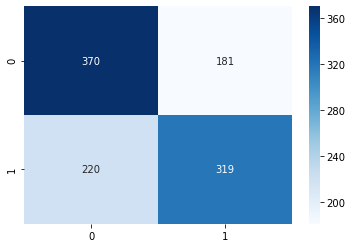

In [56]:
ann_cm = confusion_matrix(y_test, keras_grid.predict(X_scale_test))
sns.heatmap(ann_cm, annot=True, fmt = 'd', cmap = 'Blues');

# Removing unscaled factors:

In [42]:
X_continuous_train = X_scale_train.loc[:, scale_columns]
X_continuous_test = X_scale_test.loc[:, scale_columns]

In [43]:
nn_params = {
    'dropout': [.2, .4, .6, .8],
    'n_size': [16, 32, 64, 128],
    'input_size': [X_continuous_train.shape[1]]
}

In [44]:
mod = KerasClassifier(build_fn=get_model)
keras_grid_2 = GridSearchCV(estimator=mod, param_grid=nn_params)

In [45]:
keras_grid_2.fit(X_continuous_train, np.array(y_train), batch_size=32, epochs=20)

Train on 2906 samples
Epoch 1/20
2906/2906 [==============================] - 0s 152us/sample - loss: 0.7533 - accuracy: 0.5292
Epoch 2/20
2906/2906 [==============================] - 0s 44us/sample - loss: 0.6825 - accuracy: 0.5946
Epoch 3/20
2906/2906 [==============================] - 0s 44us/sample - loss: 0.6688 - accuracy: 0.6032
Epoch 4/20
2906/2906 [==============================] - 0s 45us/sample - loss: 0.6577 - accuracy: 0.6129
Epoch 5/20
2906/2906 [==============================] - 0s 45us/sample - loss: 0.6429 - accuracy: 0.6211
Epoch 6/20
2906/2906 [==============================] - 0s 45us/sample - loss: 0.6354 - accuracy: 0.6332
Epoch 7/20
2906/2906 [==============================] - 0s 42us/sample - loss: 0.6316 - accuracy: 0.6459
Epoch 8/20
2906/2906 [==============================] - 0s 42us/sample - loss: 0.6211 - accuracy: 0.6549
Epoch 9/20
2906/2906 [==============================] - 0s 45us/sample - loss: 0.6261 - accuracy: 0.6425
Epoch 10/20
2906/2906 [=========

2906/2906 [==============================] - 0s 44us/sample - loss: 0.5727 - accuracy: 0.6968
Epoch 16/20
2906/2906 [==============================] - 0s 42us/sample - loss: 0.5678 - accuracy: 0.7023
Epoch 17/20
2906/2906 [==============================] - 0s 43us/sample - loss: 0.5678 - accuracy: 0.7044
Epoch 18/20
2906/2906 [==============================] - 0s 43us/sample - loss: 0.5680 - accuracy: 0.7017
Epoch 19/20
2906/2906 [==============================] - 0s 43us/sample - loss: 0.5539 - accuracy: 0.7127
Epoch 20/20
1454/1454 [==============================] - 0s 57us/sample - loss: 0.6576 - accuracy: 0.6142
Train on 2907 samples
Epoch 1/20
2907/2907 [==============================] - 0s 129us/sample - loss: 0.7486 - accuracy: 0.5463
Epoch 2/20
2907/2907 [==============================] - 0s 43us/sample - loss: 0.6920 - accuracy: 0.5807
Epoch 3/20
2907/2907 [==============================] - 0s 47us/sample - loss: 0.6622 - accuracy: 0.6123
Epoch 4/20
2907/2907 [================

2907/2907 [==============================] - 0s 46us/sample - loss: 0.5908 - accuracy: 0.6756
Epoch 9/20
2907/2907 [==============================] - 0s 45us/sample - loss: 0.5855 - accuracy: 0.6797
Epoch 10/20
2907/2907 [==============================] - 0s 43us/sample - loss: 0.5857 - accuracy: 0.6811
Epoch 11/20
2907/2907 [==============================] - 0s 46us/sample - loss: 0.5769 - accuracy: 0.6890
Epoch 12/20
2907/2907 [==============================] - 0s 44us/sample - loss: 0.5714 - accuracy: 0.6911
Epoch 13/20
2907/2907 [==============================] - 0s 48us/sample - loss: 0.5761 - accuracy: 0.6904
Epoch 14/20
2907/2907 [==============================] - 0s 44us/sample - loss: 0.5638 - accuracy: 0.6904
Epoch 15/20
2907/2907 [==============================] - 0s 47us/sample - loss: 0.5616 - accuracy: 0.7035
Epoch 16/20
2907/2907 [==============================] - 0s 43us/sample - loss: 0.5506 - accuracy: 0.7110
Epoch 17/20
2907/2907 [==============================] - 0s

2907/2907 [==============================] - 0s 126us/sample - loss: 0.7027 - accuracy: 0.5635
Epoch 2/20
2907/2907 [==============================] - 0s 49us/sample - loss: 0.6571 - accuracy: 0.6075
Epoch 3/20
2907/2907 [==============================] - 0s 47us/sample - loss: 0.6364 - accuracy: 0.6209
Epoch 4/20
2907/2907 [==============================] - 0s 49us/sample - loss: 0.6250 - accuracy: 0.6402
Epoch 5/20
2907/2907 [==============================] - 0s 51us/sample - loss: 0.6053 - accuracy: 0.6598
Epoch 6/20
2907/2907 [==============================] - 0s 51us/sample - loss: 0.6000 - accuracy: 0.6725
Epoch 7/20
2907/2907 [==============================] - 0s 51us/sample - loss: 0.5939 - accuracy: 0.6639
Epoch 8/20
2907/2907 [==============================] - 0s 50us/sample - loss: 0.5810 - accuracy: 0.6887
Epoch 9/20
2907/2907 [==============================] - 0s 54us/sample - loss: 0.5740 - accuracy: 0.6904
Epoch 10/20
2907/2907 [==============================] - 0s 51us/

2907/2907 [==============================] - 0s 36us/sample - loss: 0.6333 - accuracy: 0.6391
Epoch 16/20
2907/2907 [==============================] - 0s 38us/sample - loss: 0.6294 - accuracy: 0.6471
Epoch 17/20
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6363 - accuracy: 0.6271
Epoch 18/20
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6294 - accuracy: 0.6288
Epoch 19/20
2907/2907 [==============================] - 0s 36us/sample - loss: 0.6262 - accuracy: 0.6319
Epoch 20/20
1453/1453 [==============================] - 0s 58us/sample - loss: 0.6276 - accuracy: 0.6394
Train on 2906 samples
Epoch 1/20
2906/2906 [==============================] - 0s 127us/sample - loss: 0.8109 - accuracy: 0.5468
Epoch 2/20
2906/2906 [==============================] - 0s 42us/sample - loss: 0.7069 - accuracy: 0.6022
Epoch 3/20
2906/2906 [==============================] - 0s 42us/sample - loss: 0.6948 - accuracy: 0.5984
Epoch 4/20
2906/2906 [================

2906/2906 [==============================] - 0s 40us/sample - loss: 0.6137 - accuracy: 0.6531
Epoch 9/20
2906/2906 [==============================] - 0s 41us/sample - loss: 0.6050 - accuracy: 0.6645
Epoch 10/20
2906/2906 [==============================] - 0s 41us/sample - loss: 0.6016 - accuracy: 0.6624
Epoch 11/20
2906/2906 [==============================] - 0s 40us/sample - loss: 0.6005 - accuracy: 0.6714
Epoch 12/20
2906/2906 [==============================] - 0s 38us/sample - loss: 0.6042 - accuracy: 0.6621
Epoch 13/20
2906/2906 [==============================] - 0s 38us/sample - loss: 0.5929 - accuracy: 0.6789
Epoch 14/20
2906/2906 [==============================] - 0s 40us/sample - loss: 0.5978 - accuracy: 0.6741
Epoch 15/20
2906/2906 [==============================] - 0s 40us/sample - loss: 0.5899 - accuracy: 0.6800
Epoch 16/20
2906/2906 [==============================] - 0s 40us/sample - loss: 0.5815 - accuracy: 0.6934
Epoch 17/20
2906/2906 [==============================] - 0s

2907/2907 [==============================] - 0s 131us/sample - loss: 0.7167 - accuracy: 0.5604
Epoch 2/20
2907/2907 [==============================] - 0s 49us/sample - loss: 0.6617 - accuracy: 0.6144
Epoch 3/20
2907/2907 [==============================] - 0s 50us/sample - loss: 0.6421 - accuracy: 0.6216
Epoch 4/20
2907/2907 [==============================] - 0s 49us/sample - loss: 0.6417 - accuracy: 0.6340
Epoch 5/20
2907/2907 [==============================] - 0s 47us/sample - loss: 0.6198 - accuracy: 0.6529
Epoch 6/20
2907/2907 [==============================] - 0s 50us/sample - loss: 0.6073 - accuracy: 0.6608
Epoch 7/20
2907/2907 [==============================] - 0s 50us/sample - loss: 0.6051 - accuracy: 0.6591
Epoch 8/20
2907/2907 [==============================] - 0s 53us/sample - loss: 0.5995 - accuracy: 0.6698
Epoch 9/20
2907/2907 [==============================] - 0s 51us/sample - loss: 0.5901 - accuracy: 0.6756
Epoch 10/20
2907/2907 [==============================] - 0s 55us/

Epoch 8/20
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6614 - accuracy: 0.5910
Epoch 9/20
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6641 - accuracy: 0.5941
Epoch 10/20
2907/2907 [==============================] - 0s 38us/sample - loss: 0.6459 - accuracy: 0.6020
Epoch 11/20
2907/2907 [==============================] - 0s 36us/sample - loss: 0.6442 - accuracy: 0.6109
Epoch 12/20
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6545 - accuracy: 0.6099
Epoch 13/20
2907/2907 [==============================] - 0s 36us/sample - loss: 0.6447 - accuracy: 0.6041
Epoch 14/20
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6355 - accuracy: 0.6116
Epoch 15/20
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6407 - accuracy: 0.6106
Epoch 16/20
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6434 - accuracy: 0.6164
Epoch 17/20
2907/2907 [=========================

2907/2907 [==============================] - 1s 184us/sample - loss: 0.7955 - accuracy: 0.5521
Epoch 2/20
2907/2907 [==============================] - 0s 42us/sample - loss: 0.7357 - accuracy: 0.5611
Epoch 3/20
2907/2907 [==============================] - 0s 38us/sample - loss: 0.7161 - accuracy: 0.5700
Epoch 4/20
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6843 - accuracy: 0.5838
Epoch 5/20
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6857 - accuracy: 0.5803
Epoch 6/20
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6661 - accuracy: 0.6078
Epoch 7/20
2907/2907 [==============================] - 0s 38us/sample - loss: 0.6557 - accuracy: 0.6096
Epoch 8/20
2907/2907 [==============================] - 0s 38us/sample - loss: 0.6578 - accuracy: 0.5992
Epoch 9/20
2907/2907 [==============================] - 0s 39us/sample - loss: 0.6587 - accuracy: 0.6116
Epoch 10/20
2907/2907 [==============================] - 0s 36us/

2907/2907 [==============================] - 0s 39us/sample - loss: 0.6263 - accuracy: 0.6491
Epoch 16/20
2907/2907 [==============================] - 0s 38us/sample - loss: 0.6194 - accuracy: 0.6495
Epoch 17/20
2907/2907 [==============================] - 0s 40us/sample - loss: 0.6219 - accuracy: 0.6381
Epoch 18/20
2907/2907 [==============================] - 0s 40us/sample - loss: 0.6164 - accuracy: 0.6426
Epoch 19/20
2907/2907 [==============================] - 0s 40us/sample - loss: 0.6261 - accuracy: 0.6447
Epoch 20/20
1453/1453 [==============================] - 0s 60us/sample - loss: 0.6252 - accuracy: 0.6456
Train on 2906 samples
Epoch 1/20
2906/2906 [==============================] - 0s 133us/sample - loss: 0.7926 - accuracy: 0.5409
Epoch 2/20
2906/2906 [==============================] - 0s 47us/sample - loss: 0.7012 - accuracy: 0.5946
Epoch 3/20
2906/2906 [==============================] - 0s 46us/sample - loss: 0.6657 - accuracy: 0.6139
Epoch 4/20
2906/2906 [================

2906/2906 [==============================] - 0s 36us/sample - loss: 0.6827 - accuracy: 0.5709
Epoch 9/20
2906/2906 [==============================] - 0s 37us/sample - loss: 0.6806 - accuracy: 0.5705
Epoch 10/20
2906/2906 [==============================] - 0s 37us/sample - loss: 0.6720 - accuracy: 0.5726
Epoch 11/20
2906/2906 [==============================] - 0s 37us/sample - loss: 0.6695 - accuracy: 0.5802
Epoch 12/20
2906/2906 [==============================] - 0s 34us/sample - loss: 0.6756 - accuracy: 0.5623
Epoch 13/20
2906/2906 [==============================] - 0s 36us/sample - loss: 0.6619 - accuracy: 0.5884
Epoch 14/20
2906/2906 [==============================] - 0s 36us/sample - loss: 0.6575 - accuracy: 0.5884
Epoch 15/20
2906/2906 [==============================] - 0s 37us/sample - loss: 0.6624 - accuracy: 0.5905
Epoch 16/20
2906/2906 [==============================] - 0s 38us/sample - loss: 0.6531 - accuracy: 0.5950
Epoch 17/20
2906/2906 [==============================] - 0s

2907/2907 [==============================] - 0s 133us/sample - loss: 1.1480 - accuracy: 0.4960
Epoch 2/20
2907/2907 [==============================] - 0s 40us/sample - loss: 0.9177 - accuracy: 0.5273
Epoch 3/20
2907/2907 [==============================] - 0s 41us/sample - loss: 0.8476 - accuracy: 0.5408
Epoch 4/20
2907/2907 [==============================] - 0s 41us/sample - loss: 0.7474 - accuracy: 0.5655
Epoch 5/20
2907/2907 [==============================] - 0s 42us/sample - loss: 0.7393 - accuracy: 0.5576
Epoch 6/20
2907/2907 [==============================] - 0s 40us/sample - loss: 0.7207 - accuracy: 0.5538
Epoch 7/20
2907/2907 [==============================] - ETA: 0s - loss: 0.6904 - accuracy: 0.58 - 0s 40us/sample - loss: 0.6930 - accuracy: 0.5748
Epoch 8/20
2907/2907 [==============================] - 0s 39us/sample - loss: 0.6751 - accuracy: 0.5862
Epoch 9/20
2907/2907 [==============================] - 0s 39us/sample - loss: 0.6704 - accuracy: 0.5903
Epoch 10/20
2907/2907 [

2907/2907 [==============================] - 0s 41us/sample - loss: 0.6381 - accuracy: 0.6240
Epoch 16/20
2907/2907 [==============================] - 0s 39us/sample - loss: 0.6372 - accuracy: 0.6330
Epoch 17/20
2907/2907 [==============================] - 0s 40us/sample - loss: 0.6375 - accuracy: 0.6374
Epoch 18/20
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6300 - accuracy: 0.6347
Epoch 19/20
2907/2907 [==============================] - 0s 37us/sample - loss: 0.6407 - accuracy: 0.6371
Epoch 20/20
1453/1453 [==============================] - 0s 59us/sample - loss: 0.6392 - accuracy: 0.6118
Train on 2907 samples
Epoch 1/20
2907/2907 [==============================] - 0s 131us/sample - loss: 0.9852 - accuracy: 0.5139
Epoch 2/20
2907/2907 [==============================] - 0s 45us/sample - loss: 0.8386 - accuracy: 0.5452
Epoch 3/20
2907/2907 [==============================] - 0s 45us/sample - loss: 0.7692 - accuracy: 0.5535
Epoch 4/20
2907/2907 [================

2907/2907 [==============================] - 0s 41us/sample - loss: 0.6472 - accuracy: 0.6209
Epoch 9/20
2907/2907 [==============================] - 0s 40us/sample - loss: 0.6447 - accuracy: 0.6164
Epoch 10/20
2907/2907 [==============================] - 0s 40us/sample - loss: 0.6484 - accuracy: 0.6175
Epoch 11/20
2907/2907 [==============================] - 0s 40us/sample - loss: 0.6462 - accuracy: 0.6120
Epoch 12/20
2907/2907 [==============================] - 0s 41us/sample - loss: 0.6461 - accuracy: 0.6209
Epoch 13/20
2907/2907 [==============================] - 0s 41us/sample - loss: 0.6408 - accuracy: 0.6223
Epoch 14/20
2907/2907 [==============================] - 0s 40us/sample - loss: 0.6357 - accuracy: 0.6278
Epoch 15/20
2907/2907 [==============================] - 0s 41us/sample - loss: 0.6412 - accuracy: 0.6161
Epoch 16/20
2907/2907 [==============================] - 0s 41us/sample - loss: 0.6225 - accuracy: 0.6357
Epoch 17/20
2907/2907 [==============================] - 0s

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E009553408>,
             iid='warn', n_jobs=None,
             param_grid={'dropout': [0.2, 0.4, 0.6, 0.8], 'input_size': [80],
                         'n_size': [16, 32, 64, 128]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [46]:
keras_grid_2.best_estimator_.get_params()

{'dropout': 0.6,
 'input_size': 80,
 'n_size': 128,
 'build_fn': <function __main__.get_model(dropout, n_size, input_size)>}

In [47]:
keras_grid_2.score(X_continuous_test, y_test)

1090/1090 [==============================] - 0s 72us/sample - loss: 0.6510 - accuracy: 0.6275


0.62752295

0.6837155584886982


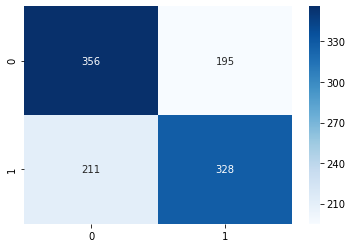

In [48]:
keras_2_cm = confusion_matrix(y_test, keras_grid_2.predict(X_continuous_test))

print(roc_auc_score(y_test, keras_grid_2.predict_proba(X_continuous_test)[:, 1]))

sns.heatmap(keras_2_cm, annot=True, fmt = 'd', cmap = 'Blues');

In [49]:
X_test.shape

(1090, 106)

ROC AUC MLP1: 0.6871634976379597
ROC AUC MLP2: 0.6837155584886982


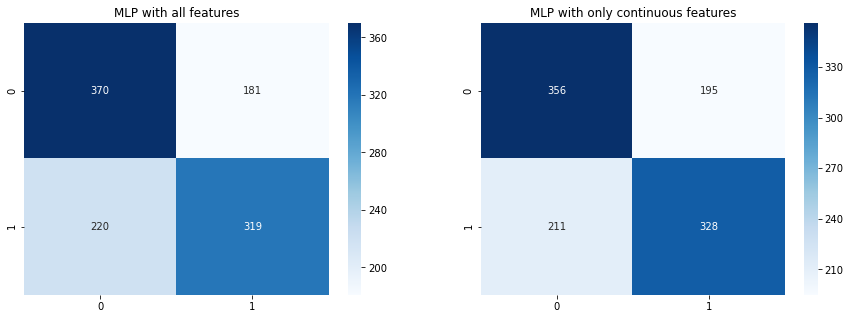

In [58]:
f, ax = plt.subplots(1, 2, figsize=(15,5))

sns.heatmap(ann_cm, annot=True, fmt = 'd', cmap = 'Blues', ax=ax[0]);
sns.heatmap(keras_2_cm, annot=True, fmt = 'd', cmap = 'Blues', ax=ax[1]);

ax[0].set_title('MLP with all features')
ax[1].set_title('MLP with only continuous features')

print('ROC AUC MLP1:', roc_auc_score(y_test, keras_grid.predict_proba(X_scale_test)[:, 1]))
print('ROC AUC MLP2:', roc_auc_score(y_test, keras_grid_2.predict_proba(X_continuous_test)[:, 1]))

# Offload Models:

In [100]:
import joblib

In [231]:
joblib.dump(xgbGrid.best_estimator_, 'xgboost_clf')

['xgboost_clf']

In [178]:
keras_grid_2.best_estimator_.model.save('mlp')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mlp\assets


In [233]:
list(X_train.columns)

['age',
 'loss',
 'win',
 'draws',
 'streak',
 'cum_match_time',
 'avg_cum_KD',
 'avg_cum_Sub. att',
 'avg_cum_Pass',
 'avg_cum_Rev.',
 'avg_cum_Sig. str. Hits',
 'avg_cum_Sig. str. Attempts',
 'avg_cum_Total str. Hits',
 'avg_cum_Total str. Attempts',
 'avg_cum_Td Hits',
 'avg_cum_Td Attempts',
 'avg_cum_Head Hits',
 'avg_cum_Head Attempts',
 'avg_cum_Body Hits',
 'avg_cum_Body Attempts',
 'avg_cum_Leg Hits',
 'avg_cum_Leg Attempts',
 'avg_cum_Distance Hits',
 'avg_cum_Distance Attempts',
 'avg_cum_Clinch Hits',
 'avg_cum_Clinch Attempts',
 'avg_cum_Ground Hits',
 'avg_cum_Ground Attempts',
 'eff_sig_str',
 'eff_hits',
 'eff_tds',
 'eff_head',
 'eff_leg',
 'eff_body',
 'eff_distance',
 'eff_clinch',
 'eff_ground',
 'age.1',
 'loss.1',
 'win.1',
 'draws.1',
 'streak.1',
 'cum_match_time.1',
 'avg_cum_KD.1',
 'avg_cum_Sub. att.1',
 'avg_cum_Pass.1',
 'avg_cum_Rev..1',
 'avg_cum_Sig. str. Hits.1',
 'avg_cum_Sig. str. Attempts.1',
 'avg_cum_Total str. Hits.1',
 'avg_cum_Total str. Attempts.1',
 'avg_cum_Td Hits.1',
 'avg_cum_Td Attempts.1',
 'avg_cum_Head Hits.1',
 'avg_cum_Head Attempts.1',
 'avg_cum_Body Hits.1',
 'avg_cum_Body Attempts.1',
 'avg_cum_Leg Hits.1',
 'avg_cum_Leg Attempts.1',
 'avg_cum_Distance Hits.1',
 'avg_cum_Distance Attempts.1',
 'avg_cum_Clinch Hits.1',
 'avg_cum_Clinch Attempts.1',
 'avg_cum_Ground Hits.1',
 'avg_cum_Ground Attempts.1',
 'eff_sig_str.1',
 'eff_hits.1',
 'eff_tds.1',
 'eff_head.1',
 'eff_leg.1',
 'eff_body.1',
 'eff_distance.1',
 'eff_clinch.1',
 'eff_ground.1',
 'title_bout',
 'num_rounds',
 'matches',
 'matches.1',
 'Reach_diff',
 'Weight_diff',
 'Height_diff',
 'Bantamweight',
 'Catch Weight',
 'Featherweight',
 'Flyweight',
 'Heavyweight',
 'Light Heavyweight',
 'Lightweight',
 'Middleweight',
 'Open Weight',
 'Super Heavyweight',
 'Welterweight',
 "Women's Bantamweight",
 "Women's Featherweight",
 "Women's Flyweight",
 "Women's Strawweight",
 'Open Stance',
 'Orthodox',
 'Sideways',
 'Southpaw',
 'Switch',
 'Open Stance.1',
 'Orthodox.1',
 'Sideways.1',
 'Southpaw.1',
 'Switch.1']